# Simulating Equity Trading Volume with Pareto Distribution

**Extreme value theory (EVT)** is employed for evaluating the risk associated with rare and severe natural and human-made events. These events often involve clusters of extreme observations that cannot be effectively modeled using a Gaussian distribution. The **generalized Pareto distribution (GPD)** has demonstrated its effectiveness in modeling such events, particularly when dealing with extreme values surpassing a predefined threshold [1]. The GPD has uniform, triangular, exponential, and Pareto distribution as special cases. Halder and Das, through graphical analysis, validate the applicability of the GPD in modeling stock volume data [1].

We employ a **Pareto distribution** to model non-negative trading **volume** data for equities. It's important to note that this simulation does not have any correlation with any actual asset prices, as it might in real-world scenarios [2].

To generate volume data, we use a vectorized approach to sample from a Pareto distribution, which mimics the daily trading volume for a stock. Since the Pareto distribution yields floating point values, we must **scale** them and cast them to integers to prevent the simulation of 'fractional shares.' The values obtained from the Pareto distribution are multiplied by a scalar factor of $10^6$ to represent typical large-cap equity daily volume figures. It's worth mentioning that this volume data does **not** exhibit any **autocorrelation** and is not correlated to any asset prices [2].

In [1]:
# import relevant packages
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# define Trading Volume Simulator class

class TradingVolumeSimulator:
    """
    Trading Volume Simulator.
    
    This callable class will generate a DataFrame with daily volume 
    data. The generator uses a Pareto distribution to simulate the 
    volume data.
    
    Parameters
    ----------
    start_date : `str`
        The starting date in YYYY-MM-DD format.
    end_date : `str`
        The ending date in YYYY-MM-DD format.
    pareto_shape : `float`
        The parameter used to govern the Pareto distribution
        shape for the generation of volume data.
    """

    def __init__(self, start_date, end_date, pareto_shape):
        self.start_date = start_date
        self.end_date = end_date
        self.pareto_shape = pareto_shape
    

    def _create_empty_frame(self):
        """
        Creates the empty Pandas DataFrame with a date column using
        business days between two dates. Each of the volume columns 
        are set to zero [2].

        Returns
        -------
        `pd.DataFrame`
            The empty DataFrame for subsequent population.
        """
        date_range = pd.date_range(
            self.start_date,
            self.end_date,
            freq='B'
        )

        zeros = pd.Series(np.zeros(len(date_range)))

        return pd.DataFrame(
            {
                'date': date_range,
                'volume': zeros
            }
        )[['date', 'volume']]


    def _append_volume_to_data(self, data):
        """
        Utilises a Pareto distribution to simulate non-negative
        volume data. Note that this is not correlated to any
        underlying asset price, as may likely be the case for
        real world data [2].

        Parameters
        ----------
        data : `pd.DataFrame`
            The DataFrame to append volume data to, in place.

        Returns
        -------
        `pd.DataFrame`
            The DataFrame with volume data populated.
        """
        data['volume'] = np.array(
            list(
                map(
                    int,
                    np.random.pareto(
                        self.pareto_shape,
                        size=len(data)
                    ) * 1000000.0
                )
            )
        )
        
        return data


    def simulate(self):
        """
        Runs the trading volume simulation 
        step-by-step.
        
        Returns
        -------
        `pd.DataFrame`
            The DataFrame with simulated volume data.
        """
        data = self._create_empty_frame()
        data = self._append_volume_to_data(data)
        return data

In [3]:
# run simulation

# set parameters
random_seed = 42
start_date='1970-01-01'
end_date='2070-12-31'
pareto_shape = 1.161

# need to seed both Python and NumPy separately
random.seed(random_seed)
np.random.seed(seed=random_seed)

# simulate
simulator = TradingVolumeSimulator(start_date, end_date, pareto_shape)
data = simulator.simulate()

# display simulated data
data.head()

,date,volume
0,1970-01-01,498093
1,1970-01-02,12365772
2,1970-01-05,2108523
3,1970-01-06,1195350
4,1970-01-07,157314


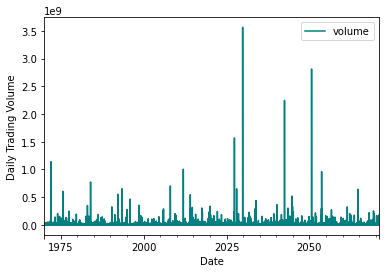

In [4]:
# visualise simulated data
df = data.set_index('date')
df[['volume']].plot(color='teal')
plt.xlabel('Date')
plt.ylabel('Daily Trading Volume')
plt.show()

## References
[1] https://libjournal.uncg.edu/ncjms/article/view/1356/0   
[2] https://www.quantstart.com/articles/geometric-brownian-motion-simulation-with-python/